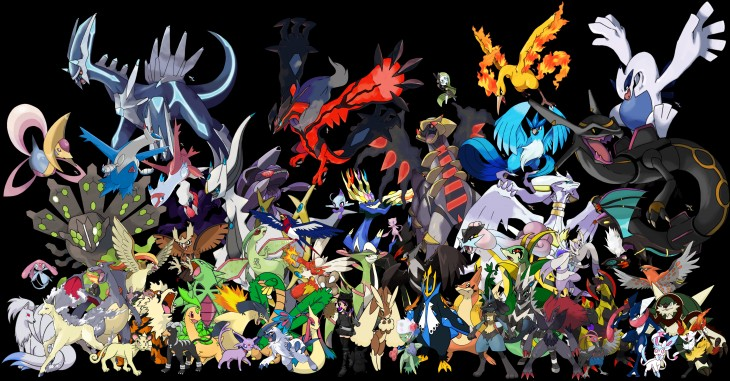



## Classifying Legendary Pokemon

Well everyone knows pokemon, don't you? :D
But the task of identifying the pokemon into legendary or not can be subtle one. Let's try to figure it out through using Machine learning and Data Science.

This notebook will use a dataset that contains Pokemon from Generation I to VII. This dataset currently ommits the last 8 Pokemon from Generation VII, resulting in a total of 801 different Pokemon.

What constitutes a Pokemon to be legendary? Directly from The Bulbapedia Wiki, legendary Pokemon

...are a group of incredibly rare and often very powerful Pokémon, generally featured prominently in the legends and myths of the Pokémon world...No explicit criteria defines what makes a Pokémon a Legendary Pokémon. Instead, the only way to identify a Pokémon as belonging to this group is through statements from official media, such as the games or anime.

Although there are no explicit criteria in what defines a Pokemon to be legendary, we know for a fact that legendary Pokemon are "...incredibly rare and often very powerful...". Using the stats of each Pokemon, I will attempt to use classification models to see if how accurate we can predict a legendary Pokemon!

In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from time import time

In [2]:
df_poke = pd.read_csv('pokemon.csv')

In [3]:
df_poke.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [4]:
df_poke.tail()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1
800,['Soul-Heart'],0.25,0.5,0.0,1.0,0.5,1.0,2.0,0.5,1.0,...,NaN,801,130,115,65,steel,fairy,80.5,7,1


In [5]:
df_poke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [6]:
df_poke.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


## 1. EDA

In [7]:
print('Column name')
for col in df_poke.columns:
    if df_poke[col].dtype=='object':
        print(col, df_poke[col].nunique())

Column name
abilities 482
capture_rate 34
classfication 588
japanese_name 801
name 801
type1 18
type2 18


In [8]:
#change capture_rate column to numeric
df_poke['capture_rate'] = pd.to_numeric(df_poke['capture_rate'], errors='coerce')

In [9]:
df_poke.isna().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           1
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [10]:
#handle missing data
df_poke['type2'].fillna('None', inplace=True)
df_poke['capture_rate'].fillna(df_poke['capture_rate'].median(), inplace=True)
df_poke['height_m'].fillna(df_poke['height_m'].median(), inplace=True)
df_poke['percentage_male'].fillna(df_poke['percentage_male'].median(), inplace=True)
df_poke['weight_kg'].fillna(df_poke['weight_kg'].median(), inplace=True)

In [11]:
df_poke.isna().sum()

abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
name                 0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

In [12]:
df_poke.shape

(801, 41)

In [13]:
#check duplicated data
df_poke_dup = df_poke[df_poke.duplicated(keep='last')]
df_poke_dup

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary


#### Now the data frame is ready (dtypes are OK, free from missing values and duplicated data) 

## 2. Visualization to Gain Insights

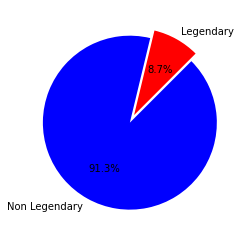

In [14]:
#count of legendary pokemon in pie plot
pokeLeg = df_poke[df_poke['is_legendary'] == True]
pokeNon = df_poke[df_poke['is_legendary'] == False]

LegDist = [pokeLeg['name'].count(), pokeNon['name'].count()]
LegPie = plt.pie(LegDist,
                 labels= ['Legendary', 'Non Legendary'], 
                 autopct ='%1.1f%%',
                 colors = ['red', 'blue'],
                 startangle = 45,
                 explode=(0, 0.1)
                )

#### Legendary is only 8.7% from total pokemon, less than 10%, unbalanced data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


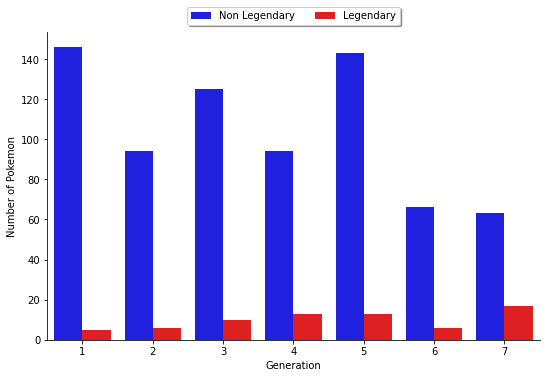

In [15]:
#correlation between legendary pokemon and non-legendary per generation
GenLeg = sns.factorplot(x='generation', 
                        data=df_poke,
                        kind='count', 
                        hue='is_legendary',
                        palette=['blue', 'red'], 
                        size=5, 
                        aspect=1.5,
                        legend=False,
                        ).set_axis_labels('Generation', 'Number of Pokemon')

GenLeg.ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),  shadow=True, ncol=2, labels=['Non Legendary','Legendary'])
plt.show()

#### Generation doesn't really have any correlation with total number of legendary per generation
#### We won't include generation in our model

Text(0.5, 1.05, 'Pearson correlation of Features')

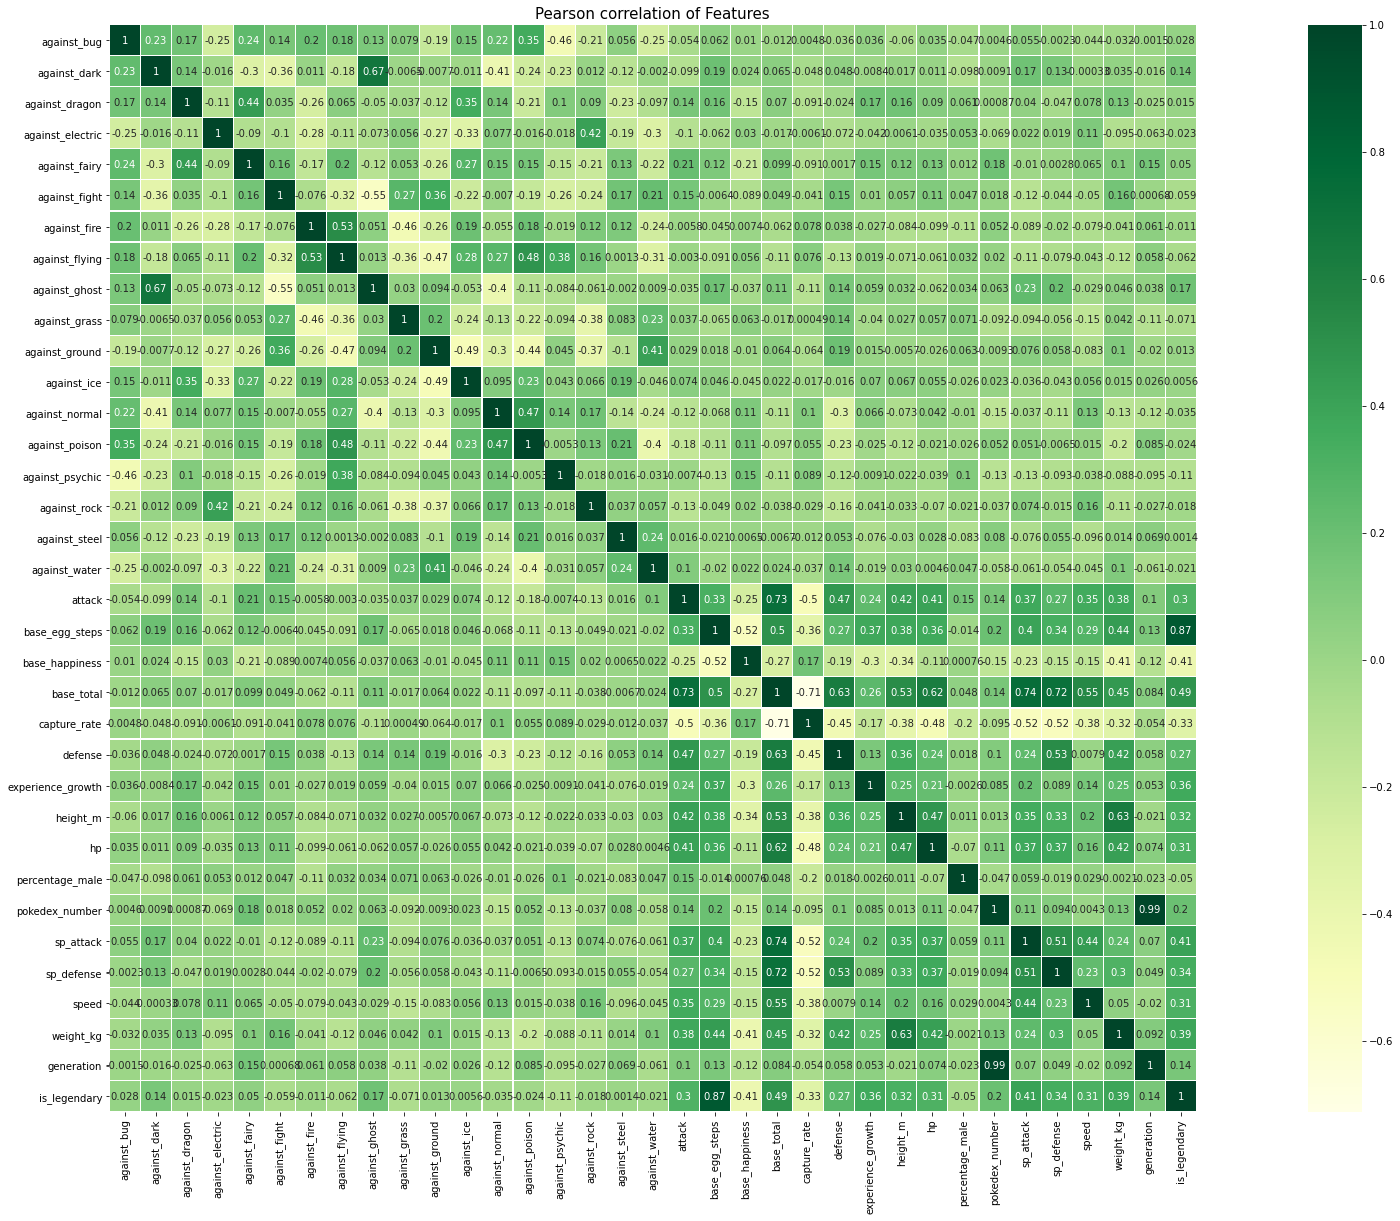

In [16]:
corr = df_poke.corr()

f, ax = plt.subplots(figsize=(40,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

#### From heatmap it seems base_egg_steps has very high number of correlation with is_legendary with 0.87
#### Ability against_xxx are all have low correlation numbers so we won't include them in our model
#### Attack, base_happiness, base_total, capture_rate, defense, experience_growth, height_m, hp, sp_attack, sp_defense, speed are all have high correlation number although still <0.5
#### We also won't include percentage_male and pokedex_number because of low correlation number and common sense

In [17]:
df_poke.dtypes.value_counts()

float64    22
int64      13
object      6
dtype: int64

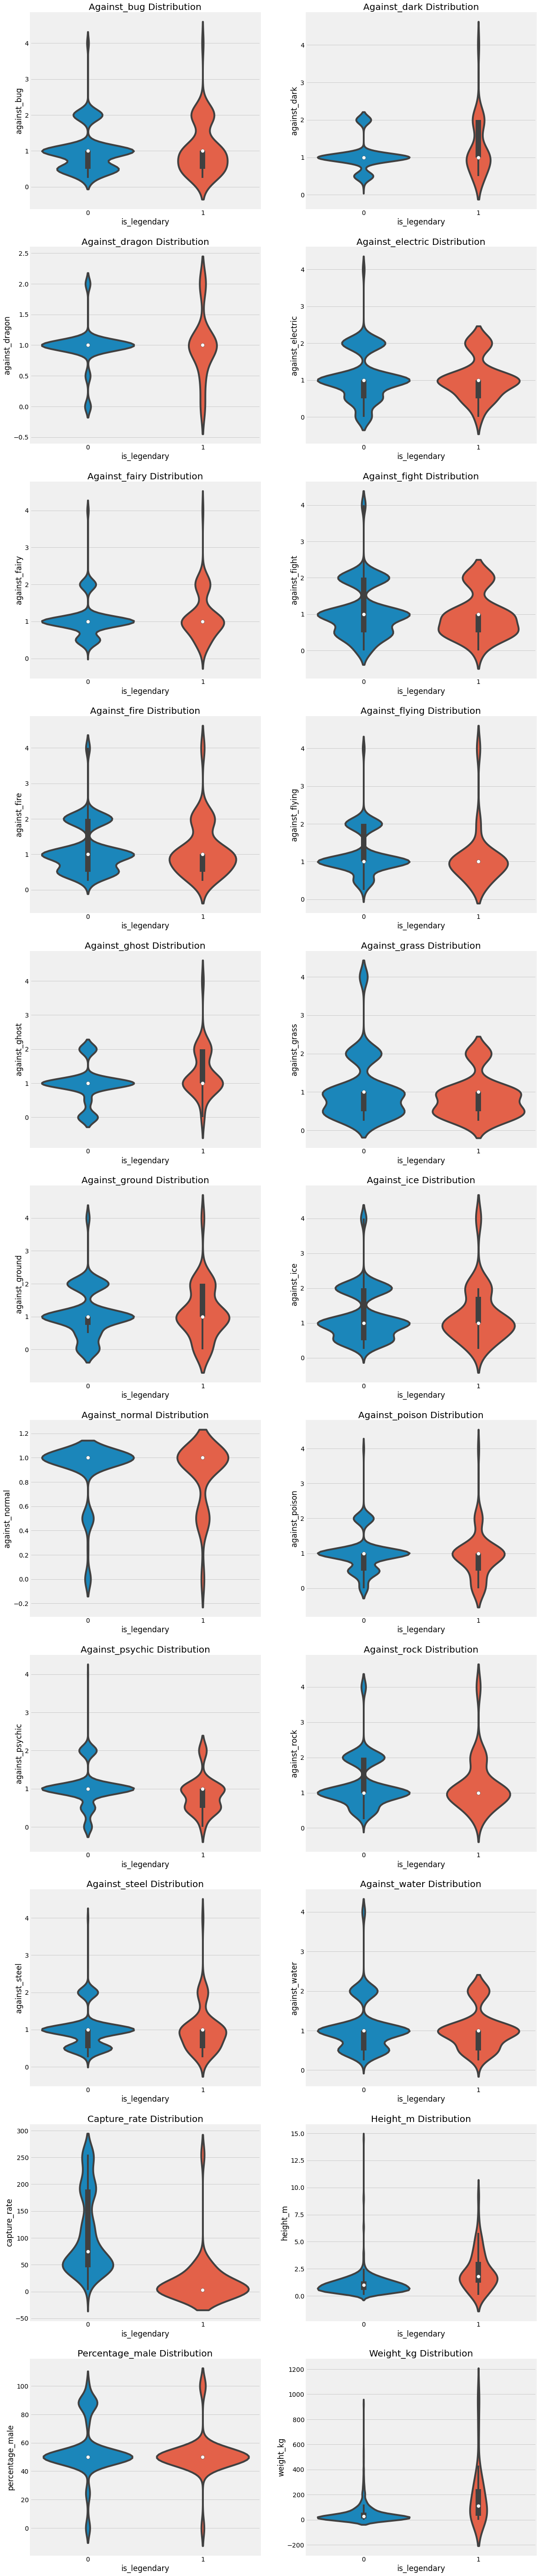

In [18]:
#Lets visualize float dtype with violin plot

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

for i, col in enumerate(df_poke.select_dtypes(np.float64)):
    ax = plt.subplot(11, 2, i + 1)
    # Iterate through the poverty levels
    sns.violinplot(x='is_legendary', y=col, data=df_poke);
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel('is_legendary'); plt.ylabel(f'{col}')

plt.subplots_adjust(top = 5)

#### From float dtype: capture rate, height_m, and weighth_kg are interesting because visually have different median and distribution for legendary or not...

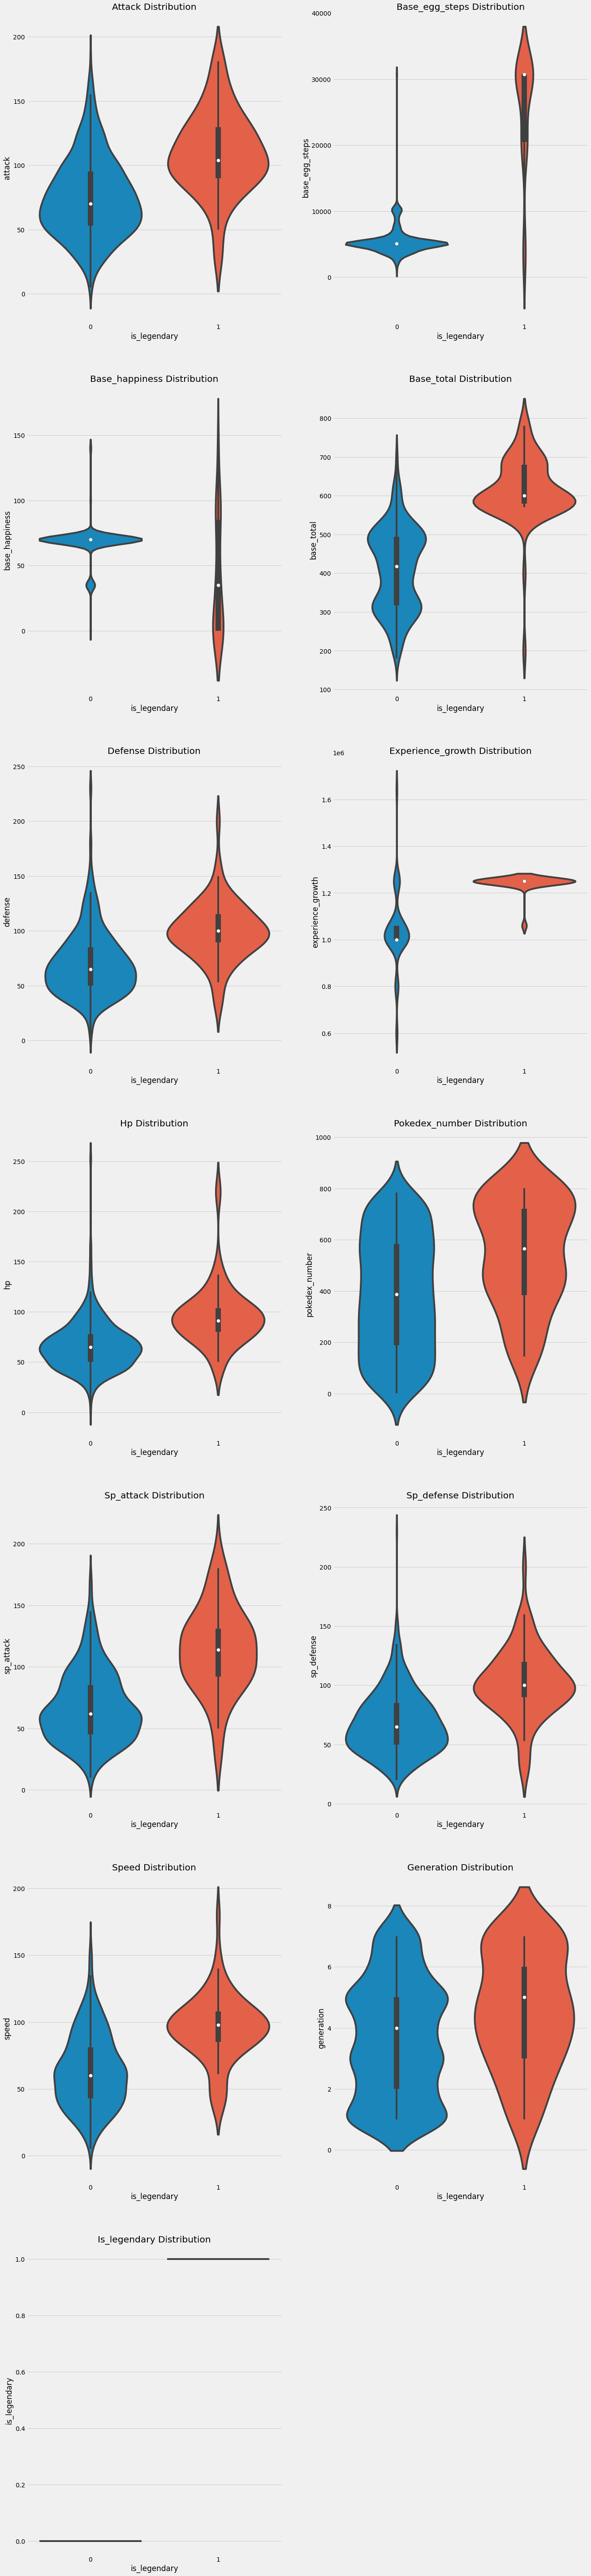

In [19]:
#Lets visualize int dtype with violin plot

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

for i, col in enumerate(df_poke.select_dtypes(np.int64)):
    ax = plt.subplot(7, 2, i + 1)
    # Iterate through the poverty levels
    sns.violinplot(x='is_legendary', y=col, data=df_poke);
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel('is_legendary'); plt.ylabel(f'{col}')

plt.subplots_adjust(top = 5)

#### from int dtype: attack, base_egg_steps, base_happiness, base_total, defense, experience_growth, hp, sp_attack, sp_defense, speed are all also interesting because visually have different median and distribution for legendary or not...

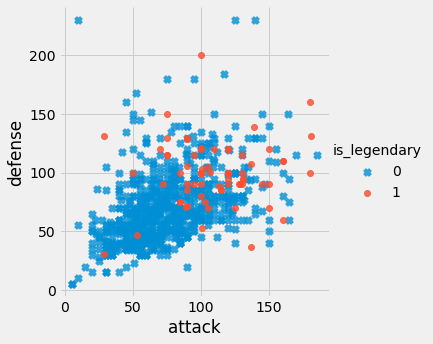

In [20]:
sns.lmplot(x='attack', y='defense', hue='is_legendary', fit_reg=False, data=df_poke, markers = ['x', 'o'])

#### Legendary pokemon usually have higher attack and defense compared to ordinary pokemon

In [21]:
#Lets visualize object dtype with count plot along with Y

def countplot_withY(label, dataset):
    plt.figure(figsize=(25,10))
    Y = df_poke[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=df_poke, hue="is_legendary")
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    #adjust the ticklabel to the desired format, without changing the position of the ticks.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
    #ax.legend(labels=['no','yes'])
    plt.show()

In [22]:
df_poke.select_dtypes(np.object).nunique()

abilities        482
classfication    588
japanese_name    801
name             801
type1             18
type2             19
dtype: int64

#### We won't include abilities, classfication, japanese_name, and name because they have too many different category

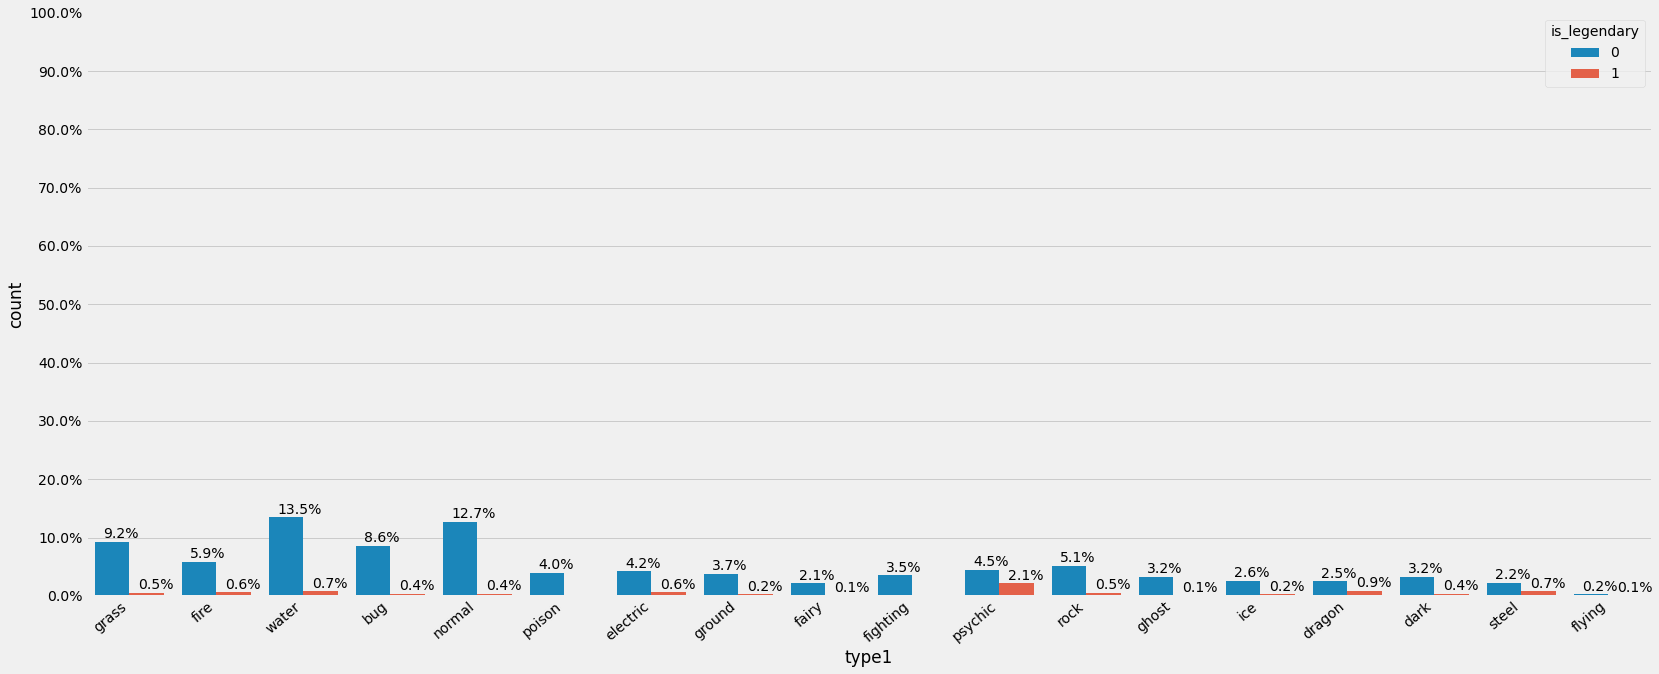

In [23]:
countplot_withY('type1', df_poke)

#### It seems like most legendary pokemon are psychic type pokemon from type1...

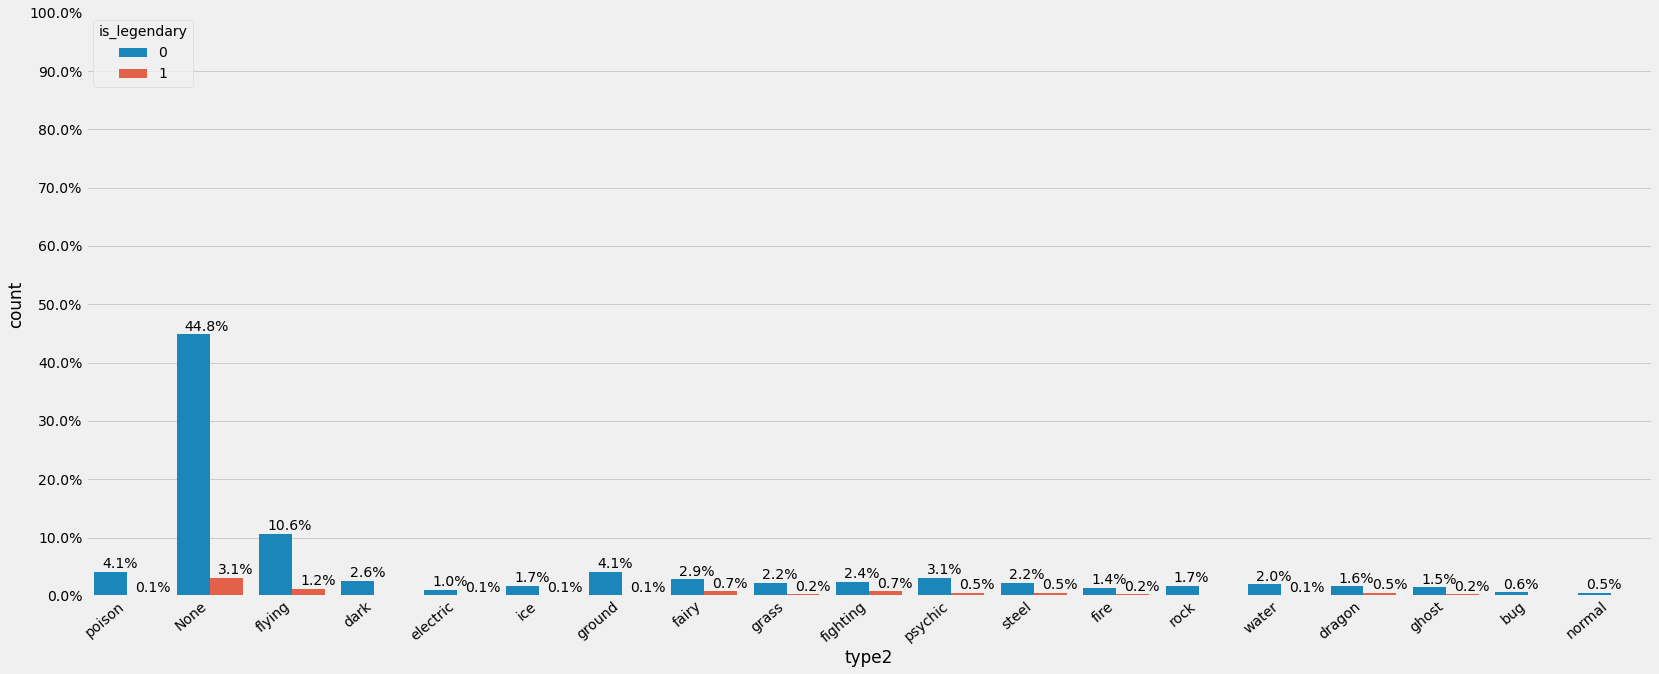

In [24]:
countplot_withY('type2', df_poke)

#### ...and they don't have type number 2 or None, so we will include those type1 and type2 in our model

In [25]:
df_poke['type1'].unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

In [26]:
df_poke['type2'].unique()

array(['poison', 'None', 'flying', 'dark', 'electric', 'ice', 'ground',
       'fairy', 'grass', 'fighting', 'psychic', 'steel', 'fire', 'rock',
       'water', 'dragon', 'ghost', 'bug', 'normal'], dtype=object)

In [27]:
#encoding category in type1 and type2
encoder = LabelEncoder()
df_poke['type1'] = encoder.fit_transform(df_poke['type1'].astype('str'))
df_poke['type2'] = encoder.fit_transform(df_poke['type2'].astype('str'))

In [28]:
df_poke.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,9,14,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,9,14,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,9,14,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,6,0,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,6,0,19.0,1,0


## 3. Creating Model

In [29]:
#Choosing X features for model
poke_X = df_poke[['type1', 'type2', 'height_m', 'weight_kg', 'capture_rate', 
                    'attack', 'base_egg_steps', 'base_happiness', 'base_total', 'defense', 
                  'experience_growth', 'hp', 'sp_attack', 'sp_defense', 'speed']]

poke_X.shape

(801, 15)

In [30]:
#Set Y target
poke_Y = df_poke['is_legendary']

poke_Y.shape

(801,)

In [31]:
df_poke.loc[df_poke['is_legendary']==1,['name','is_legendary']]

,name,is_legendary
143,Articuno,1
144,Zapdos,1
145,Moltres,1
149,Mewtwo,1
150,Mew,1
...,...,...
796,Celesteela,1
797,Kartana,1
798,Guzzlord,1
799,Necrozma,1


In [32]:
#train test split dataset
X_train, X_test, y_train, y_test = train_test_split(poke_X, poke_Y, test_size=0.3, random_state=33)

print('training size:', X_train.shape)
print('test size:', X_test.shape)

training size: (560, 15)
test size: (241, 15)


In [33]:
def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)

    train_pred = model.predict(X_train)
#    train_acc = model.score(X_train, y_train)

    test_pred = model.predict(X_test)
#    test_acc = model.score(X_test, y_test)

    print('--training performance--')
#    print('target:\n', y_train[:10])
#    print('prediction:\n', train_pred[:10])
    print(classification_report(y_train, train_pred))
#    print('accuracy score:', train_acc)
    print()
    print('--test performance--')
#    print('target:\n', y_test[:10])
#    print('prediction:\n', test_pred[:10])
    print(classification_report(y_test, test_pred))
#    print('accuracy score:', test_acc)
#    print(classification_report(y_test, test_pred))

In [34]:
#create models and check their classification report
logistic = LogisticRegression()
knn = KNeighborsClassifier()
bayes = GaussianNB()
dtree = DecisionTreeClassifier()
forest = RandomForestClassifier()
svc = SVC()

for model in [logistic, knn, bayes, dtree, forest, svc]:
    print(f"\n--- Using {model.__class__.__name__} ---")
    start = time()
    model.fit(X_train, y_train)
    end = time()
    print(f"Done training model in {end - start:.3f}s..")
    start = time()
    prediction = model.predict(X_train)
    end = time()
    print(f"Done inferencing in {end - start:.3f}s..")
    train_model(model, X_train, X_test, y_train, y_test)
    print('=========================================================')


--- Using LogisticRegression ---


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Done training model in 0.360s..
Done inferencing in 0.005s..
--training performance--
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       510
           1       0.98      0.88      0.93        50

    accuracy                           0.99       560
   macro avg       0.98      0.94      0.96       560
weighted avg       0.99      0.99      0.99       560


--test performance--
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       221
           1       0.94      0.85      0.89        20

    accuracy                           0.98       241
   macro avg       0.97      0.92      0.94       241
weighted avg       0.98      0.98      0.98       241


--- Using KNeighborsClassifier ---
Done training model in 0.019s..
Done inferencing in 0.033s..
--training performance--
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       510
       

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
logistic_acc = logistic.score(X_test, y_test)
knn_acc = knn.score(X_test, y_test)
bayes_acc = bayes.score(X_test, y_test)
dtree_acc = dtree.score(X_test, y_test)
forest_acc = forest.score(X_test, y_test)
svc_acc = svc.score(X_test, y_test)

#sorting test accuracy for each models
models = pd.DataFrame({
                'Models': ['Logistic Model', 'KNN Model', 'Gausian NB', 'Decision Tree Classifier',
                           'Random Forest Classifier', 'Support Vector Machine'],
                'Test Accuracy Score':  [logistic_acc, knn_acc, bayes_acc, dtree_acc, forest_acc, svc_acc]})

models.sort_values(by='Test Accuracy Score', ascending=False)

,Models,Test Accuracy Score
4,Random Forest Classifier,0.995851
3,Decision Tree Classifier,0.991701
0,Logistic Model,0.983402
1,KNN Model,0.979253
2,Gausian NB,0.975104
5,Support Vector Machine,0.917012


#### Based on the test accuracy score, shortest training and inference time, the winner is Decision Tree Classifier model.

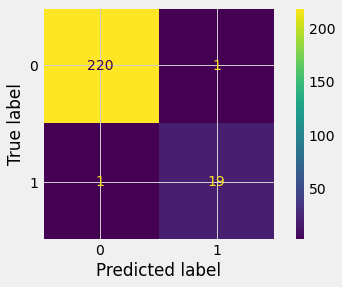

In [36]:
#create confusion matrix for Decision Tree model using sklearn
plot_confusion_matrix(dtree, X_test, y_test)
plt.show()

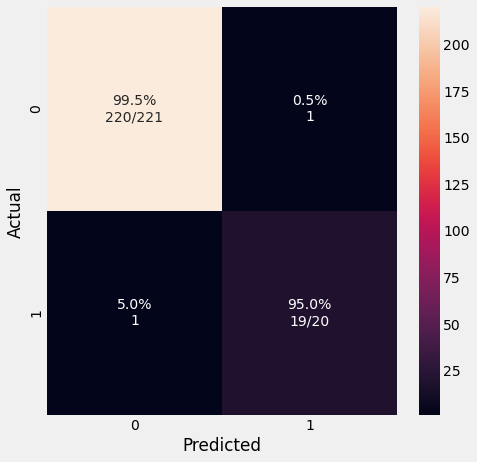

In [37]:
#create confusion matrix for Decision Tree model using seaborn
test_pred = dtree.predict(X_test)

cm = confusion_matrix(y_test, test_pred)
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)
cm = pd.DataFrame(cm)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=annot, fmt='', ax=ax)

Text(0, 0.5, 'Feature')

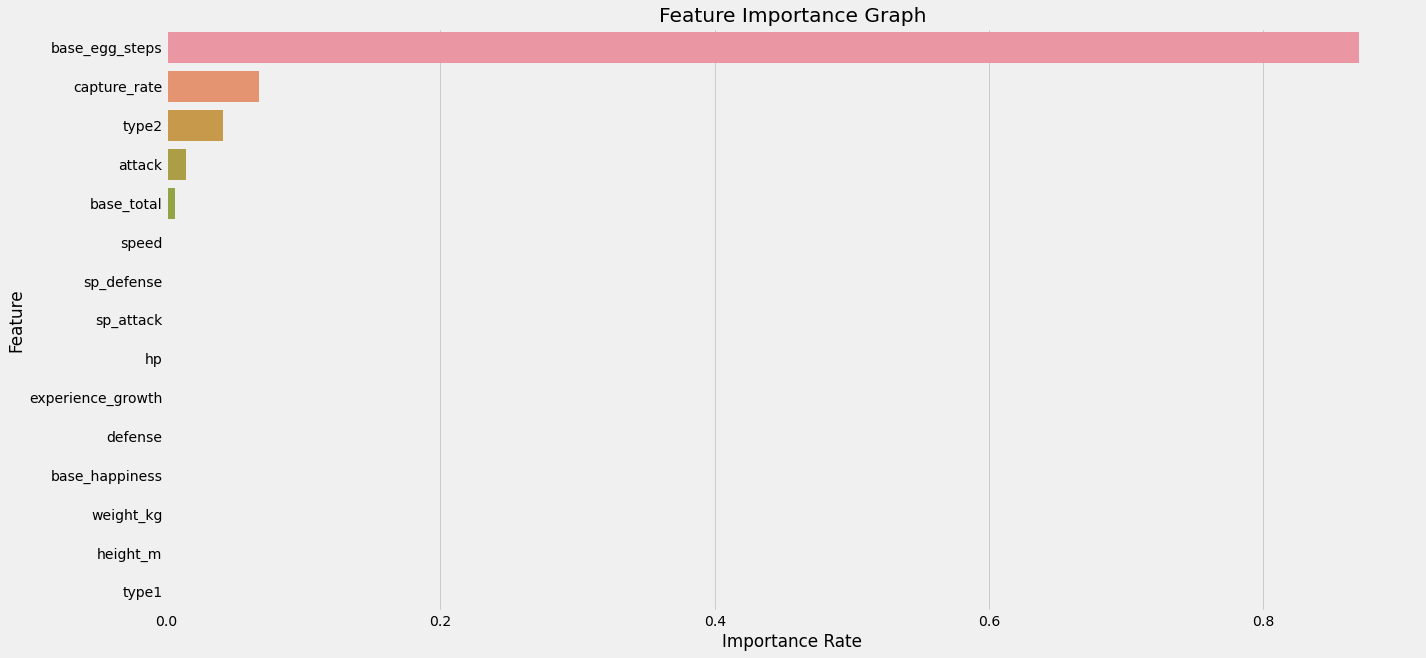

In [38]:
#checking feature of importances of Decision Tree model
feature_imp=pd.Series(dtree.feature_importances_, index=poke_X.columns).sort_values(ascending=False)

#plotting feature of importances
plt.figure(figsize=(20,10))
sns.barplot(feature_imp, y=feature_imp.index)
plt.title('Feature Importance Graph')
plt.xlabel('Importance Rate')
plt.ylabel('Feature')

In [39]:
#Choosing new X features for new model based on top 4 features in old Decision Tree model
poke_X2 = df_poke[['capture_rate', 'attack', 'base_egg_steps', 'base_total']]

poke_X2.shape

(801, 4)

In [40]:
#train test split dataset wih new poke_X2
X_train, X_test, y_train, y_test = train_test_split(poke_X2, poke_Y, test_size=0.3, random_state=33)

print('training size:', X_train.shape)
print('test size:', X_test.shape)

training size: (560, 4)
test size: (241, 4)


In [41]:
#create new models and check their classification report
logistic_2 = LogisticRegression()
knn_2 = KNeighborsClassifier()
bayes_2 = GaussianNB()
dtree_2 = DecisionTreeClassifier()
forest_2 = RandomForestClassifier()
svc_2 = SVC()

for model in [logistic_2, knn_2, bayes_2, dtree_2, forest_2, svc_2]:
    print(f"\n--- Using {model.__class__.__name__} 2 ---")
    start = time()
    model.fit(X_train, y_train)
    end = time()
    print(f"Done training model in {end - start:.3f}s..")
    start = time()
    prediction = model.predict(X_train)
    end = time()
    print(f"Done inferencing in {end - start:.3f}s..")
    train_model(model, X_train, X_test, y_train, y_test)
    print('=========================================================')


--- Using LogisticRegression 2 ---
Done training model in 0.091s..
Done inferencing in 0.005s..
--training performance--
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       510
           1       0.96      0.88      0.92        50

    accuracy                           0.99       560
   macro avg       0.97      0.94      0.95       560
weighted avg       0.99      0.99      0.99       560


--test performance--
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       221
           1       0.94      0.85      0.89        20

    accuracy                           0.98       241
   macro avg       0.97      0.92      0.94       241
weighted avg       0.98      0.98      0.98       241


--- Using KNeighborsClassifier 2 ---
Done training model in 0.003s..
Done inferencing in 0.034s..
--training performance--
              precision    recall  f1-score   support

           0       1.00

In [42]:
logistic_2_acc = logistic_2.score(X_test, y_test)
knn_2_acc = knn_2.score(X_test, y_test)
bayes_2_acc = bayes_2.score(X_test, y_test)
dtree_2_acc = dtree_2.score(X_test, y_test)
forest_2_acc = forest_2.score(X_test, y_test)
svc_2_acc = svc_2.score(X_test, y_test)

#sorting test accuracy for each models
models = pd.DataFrame({
                'Models': ['Logistic Model 2', 'KNN Model 2', 'Gausian NB 2', 'Decision Tree Classifier 2',
                           'Random Forest Classifier 2', 'Support Vector Machine 2'],
                'Test Accuracy Score':  [logistic_2_acc, knn_2_acc, bayes_2_acc, dtree_2_acc, forest_2_acc, svc_2_acc]})

models.sort_values(by='Test Accuracy Score', ascending=False)

,Models,Test Accuracy Score
3,Decision Tree Classifier 2,0.995851
4,Random Forest Classifier 2,0.995851
1,KNN Model 2,0.987552
5,Support Vector Machine 2,0.987552
0,Logistic Model 2,0.983402
2,Gausian NB 2,0.983402


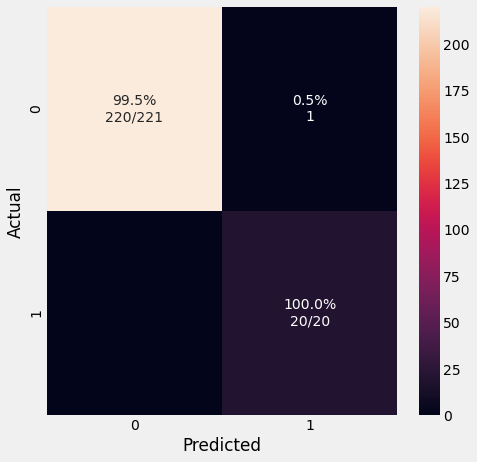

In [43]:
#create confusion matrix for NEW Decision Tree model using seaborn
test_pred = dtree_2.predict(X_test)

cm = confusion_matrix(y_test, test_pred)
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)
cm = pd.DataFrame(cm)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=annot, fmt='', ax=ax)

#### The result is pretty much same so we will use the NEW Decision Tree model since it's using less features

## 4. Saving Model

In [44]:
#save model to directory
model = dtree_2
filename = "../H8_Deployment/model/PokemonTree.joblib"
joblib.dump(model, filename)

['../H8_Deployment/model/PokemonTree.joblib']

In [45]:
#load model
loaded_model = joblib.load(filename)
print("performance on test set:")
print(classification_report(y_test, model.predict(X_test)))

performance on test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       0.95      1.00      0.98        20

    accuracy                           1.00       241
   macro avg       0.98      1.00      0.99       241
weighted avg       1.00      1.00      1.00       241



In [46]:
for output in model.predict(np.array([1, 1, 1, 1]).reshape(1, -1)):
    if output == 1:
        print("LEGENDARY")
    else:
        print("ORDINARY")

LEGENDARY


#### Model can't be deployed -> stuck in 'favicon.ico' error and gunicorn doesn't support windows

### Thank You